<img src=https://lstms-brainybits.s3.ap-south-1.amazonaws.com/green+logo.png width="300" height="200" style="float: left; margin-right: 8px;">

We believe in empowering individuals with the
knowledge and skills they need to become lifelong
learners. Our self-learning website offers a diverse
range of high-quality, interactive courses.
**All rights reserved to BrainyBits. Unauthorized reproduction or distribution of this content is prohibited.**

# Logistic Regression Solution

### 1. Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV


### 2. Importing the dataset

In [2]:
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [4]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

### 3. Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [6]:
print(X_train)

[[ 13.    129.      0.    ...  39.9     0.569  44.   ]
 [  4.    129.     86.    ...  35.1     0.231  23.   ]
 [  3.     61.     82.    ...  34.4     0.243  46.   ]
 ...
 [ 10.    101.     86.    ...  45.6     1.136  38.   ]
 [  0.    141.      0.    ...  42.4     0.205  29.   ]
 [  0.    125.     96.    ...  22.5     0.262  21.   ]]


In [7]:
print(y_train)

[1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0
 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1
 0 0 1 1 0 0 0 0 1 1 0 1 

In [8]:
print(X_test)

[[  6.     98.     58.    ...  34.      0.43   43.   ]
 [  2.    112.     75.    ...  35.7     0.148  21.   ]
 [  2.    108.     64.    ...  30.8     0.158  21.   ]
 ...
 [  6.    123.     72.    ...  33.6     0.733  34.   ]
 [  3.     78.     50.    ...  31.      0.248  26.   ]
 [  3.    106.     72.    ...  25.8     0.207  27.   ]]


In [9]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0]


### 4. Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
print(X_train)

[[ 2.80346794  0.25977903 -3.78077929 ...  1.03974028  0.29608546
   0.96352088]
 [ 0.07832678  0.25977903  0.89724451 ...  0.40945373 -0.70087555
  -0.86295593]
 [-0.22446668 -1.85825286  0.67966201 ...  0.31753694 -0.66548048
   1.13747105]
 ...
 [ 1.89508755 -0.61235174  0.89724451 ...  1.78820556  1.96850229
   0.44167036]
 [-1.13284707  0.63354937 -3.78077929 ...  1.36801453 -0.77756486
  -0.34110542]
 [-1.13284707  0.13518892  1.44120077 ... -1.24504846 -0.6094383
  -1.03690611]]


In [13]:
print(X_test)

[[ 0.6839137  -0.70579433 -0.625833   ...  0.26501306 -0.11390738
   0.87654579]
 [-0.52726014 -0.26972894  0.29889263 ...  0.48823955 -0.94569142
  -1.03690611]
 [-0.52726014 -0.39431905 -0.29945925 ... -0.15517797 -0.91619553
  -1.03690611]
 ...
 [ 0.6839137   0.07289387  0.13570575 ...  0.21248918  0.77981801
   0.09377001]
 [-0.22446668 -1.32874488 -1.06099801 ... -0.12891603 -0.65073254
  -0.60203068]
 [-0.22446668 -0.45661411  0.13570575 ... -0.81172646 -0.77166568
  -0.51505559]]


### 5. Build  Logistic Regression model

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier

LogisticRegression(random_state=42)

### 6. Hyperparameter tuning for a logistic regression model using scikit-learn's GridSearchCV

In [15]:
parameter = {'penalty':['l1', 'l2', 'elasticnet'],'C':[1,0.01,0.001],'max_iter':[100,200,300]}
logistic_regressor = GridSearchCV(classifier, param_grid=parameter, scoring='accuracy',cv=5)
logistic_regressor

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 0.01, 0.001], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

### 7. Train the Logistic Reegression model

In [16]:
logistic_regressor.fit(X_train,y_train)

/Users/rksamala/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rksamala/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rksamala/miniconda3/lib/python3.9/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/rksamala/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _c

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 0.01, 0.001], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

### 8 .Make Predictions 

In [17]:
y_pred = logistic_regressor.predict(X_test)

In [18]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

### 9. Evaluate the Model

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.7291666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       123
           1       0.62      0.65      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



### 10. Create Confusion Matrix using testing data and prediction data

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[95 28]
 [24 45]]


### 11.Visualising the Confusion Matrix  result
 

Text(95.72222222222221, 0.5, 'Truth')

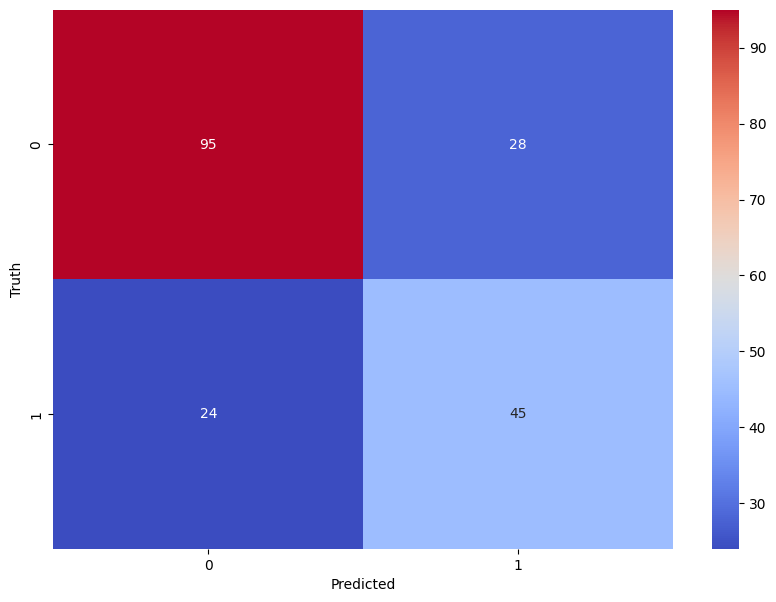

In [21]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')